# Mini project 2 - Data Cleansing Practice on Zillow Data

In this week, we’ll practice how to do regular cleansing in Python with a real-world dataset – Zillow dataset, which is available in the [Zillow Prize: Zillow’s Home Value Prediction (Zestimate)](https://www.kaggle.com/c/zillow-prize-1). This Zillow dataset contains abundant missing data and will provide you a good environment to practice your skills on data cleaning. The cleansing of this dataset will be a great start for you to further play with this Kaggle Competition if you have more interest and time.

This step-by-step mini project will illustrate you various ways to impute missing values.

In [1]:
# Start with importing essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 1. Read the train set and property set of Zillow dataset, and name them as train and properties.

In [3]:
properties = pd.read_csv('input/properties_2016.csv')
train = pd.read_csv("input/train_2016_v2.csv")

/Users/chenguang/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### 2. Merge train and properties to one dataframe on parcelid and call it as df_train. Drop the column of 'parcelid' and 'transactiondate'. Check the first 5 rows to see how this merged dataset looks like.

In [4]:
df_train = train.merge(properties, how='left', on='parcelid')
df_train.drop(['parcelid', 'transactiondate'], axis=1,inplace=True)

In [5]:
df_train.head(5)

,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,0.0276,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,-0.1684,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,-0.0040,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,0.0218,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,-0.0050,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


#### 3.  (a) Generate a dataframe called missing_df from df_train, in which there are two columns, one is the column names of our features, the other column is the missing_count (the number of missing values) of that feature. The table should be ordered by missing_count decendingly.  

In [19]:
missing_df = df_train.isnull().sum().reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

#### 3.(b) Draw a horizontal bar plot to visualize it. Following is an example to show how this figure may look like:

<img src="missing_value_barplot.png" alt="Drawing" style="width: 600px;"/>

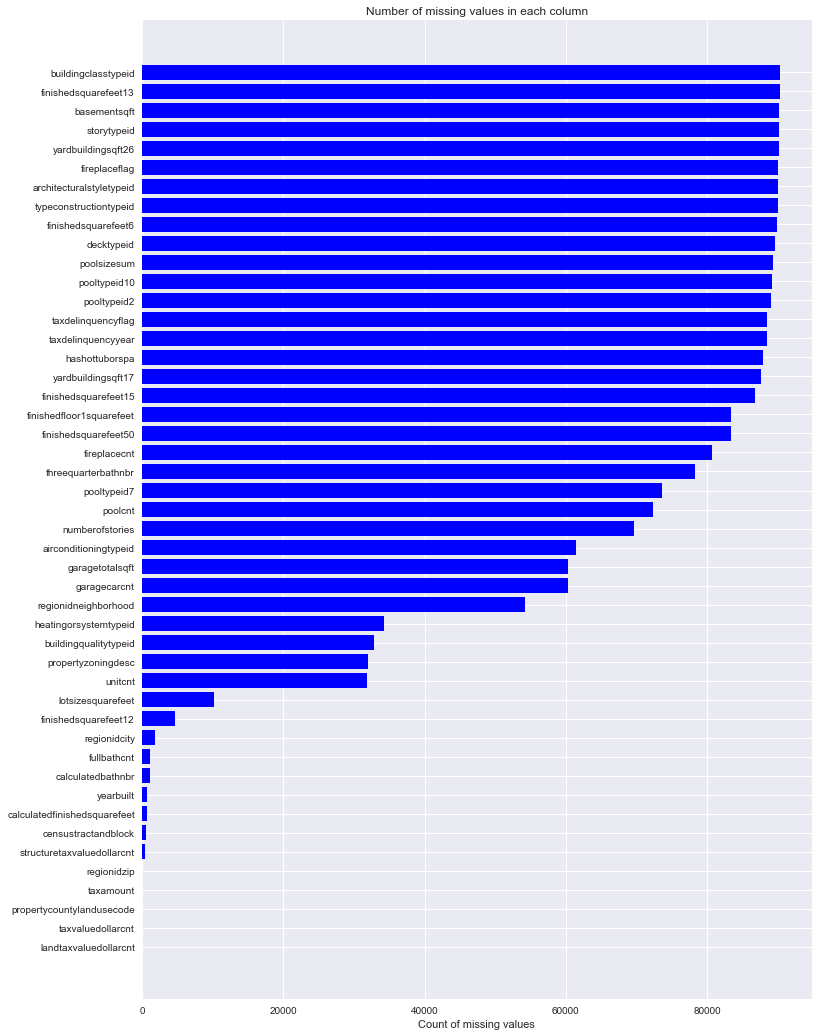

In [13]:
ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

#### 4. Generate the correlation matrix for all the numerical features, and plot it by using heatmap or related visualization methods. 

In [9]:
## Classify the features into categorical and numerical fearures
catcols = ['airconditioningtypeid','architecturalstyletypeid','buildingqualitytypeid','buildingclasstypeid','decktypeid','fips','hashottuborspa','heatingorsystemtypeid','pooltypeid10','pooltypeid2','pooltypeid7','propertycountylandusecode','propertylandusetypeid','propertyzoningdesc','rawcensustractandblock','regionidcity','regionidcounty','regionidneighborhood','regionidzip','storytypeid','typeconstructiontypeid','yearbuilt','taxdelinquencyflag']
numcols = [x for x in df_train.columns if x not in catcols]

In [22]:
numcols

['logerror',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'roomcnt',
 'threequarterbathnbr',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'numberofstories',
 'fireplaceflag',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'taxdelinquencyyear',
 'censustractandblock']

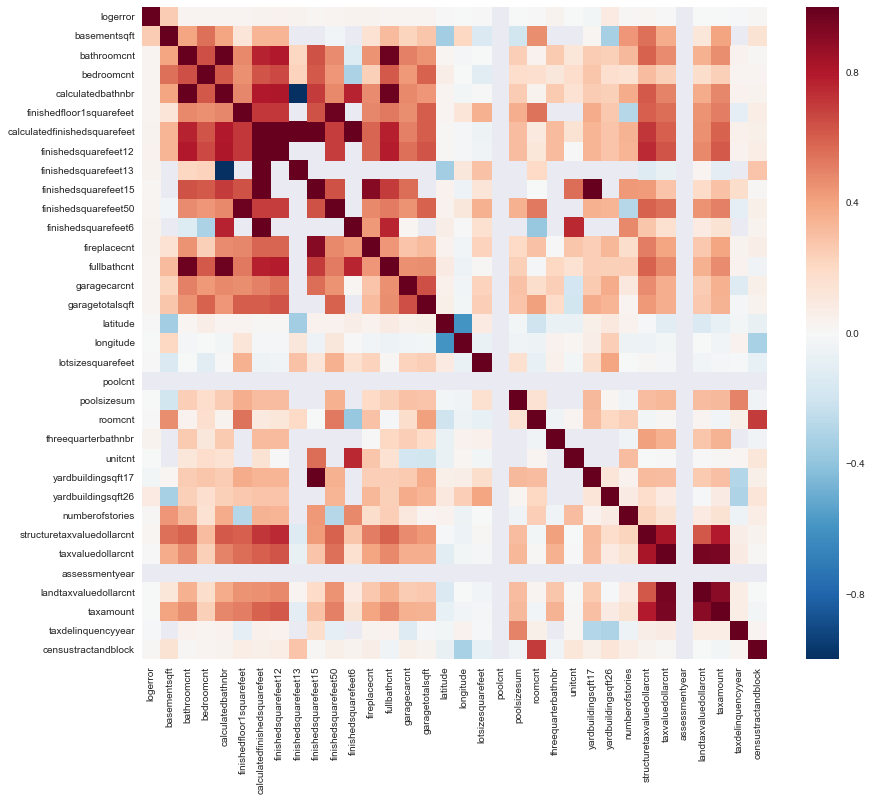

In [20]:
plt.figure(figsize = (14,12))
sns.heatmap(data=df_train[numcols].corr())
plt.show()

#### 5. From the results from Step 4, please list those features having a strong correlation. Generate a list called dropcols, and put those redundent variables into it.

In [25]:
dropcpls = []
## 'calculatedfinishedsquarefeet' 'finishedsquarefeet12' 'finishedsquarefeet13' 'finishedsquarefeet15' 
## 'finishedsquarefeet6' has strong correlations, but 'calculatedfinishedsquarefeet' doesn't have missing value, so 
## we keep it and delete the rest
dropcols.append('finishedsquarefeet12')
dropcols.append('finishedsquarefeet13')
dropcols.append('finishedsquarefeet15')
dropcols.append('finishedsquarefeet6')

In [26]:
## finishedsquarefeet50 and finishedfloor1squarefeet are the exactly the same information according to the dictionary descriptions, 
## lets remove finishedsquarefeet50 considering it has more missing values
dropcols.append('finishedsquarefeet50')

In [27]:
##'bathroomcnt' and 'calculatedbathnbr' and 'fullbathcnt' have high relationship as well.
## We keep'bathroomcnt' as has no missing values
dropcols.append('calculatedbathnbr')
dropcols.append('fullbathcnt')

#### 6. Some variables where it is NA can be considered as the object does not exist. Such as 'hashottuborspa', if it is NA, we can assume the house doesn't contain the hot tub or spa. So we need to fix this.

(a) Fix the hashottuborspa variable, fill the na part as None.

In [29]:
index = df_train.hashottuborspa.isnull()
df_train.loc[index,'hashottuborspa'] = "None"

(b) Assume if the pooltype id and its related features is null then pool/hottub doesnt exist.

In [31]:
index = df_train.pooltypeid2.isnull()
df_train.loc[index,'pooltypeid2'] = 0

In [32]:
index = df_train.pooltypeid7.isnull()
df_train.loc[index,'pooltypeid7'] = 0

In [34]:
index = df_train.pooltypeid10.isnull()
df_train.loc[index,'pooltypeid10'] = 0

In [33]:
index = df_train.poolcnt.isnull()
df_train.loc[index,'poolcnt'] = 0

(c) Tax deliquency flag - assume if it is null then doesn't exist

In [36]:
index = df_train.taxdelinquencyflag.isnull()
df_train.loc[index,'taxdelinquencyflag'] = "None"

(d) If Null in garage count (garagecarcnt) it means there are no garages, and no garage means the size (garagetotalsqft) is 0 by default

In [41]:
index = df_train.garagecarcnt.isnull()
df_train.loc[index,'garagecarcnt'] = 0

In [42]:
index = df_train.garagetotalsqft.isnull()
df_train.loc[index,'garagetotalsqft'] = 0

#### 7. There are more missing values in the 'poolsizesum' than in 'poolcnt'. Fill in median values for poolsizesum where pool count is >0 and missing.

In [35]:
#Fill in those properties that have a pool with median pool value
poolsizesum_median = df_train.loc[df_train['poolcnt'] > 0, 'poolsizesum'].median()
df_train.loc[(df_train['poolcnt'] > 0) & (df_train['poolsizesum'].isnull()), 'poolsizesum'] = poolsizesum_median

#If it doesn't have a pool then poolsizesum is 0 by default
df_train.loc[(df_train['poolcnt'] == 0), 'poolsizesum'] = 0

#### 8. The number of missing value of 'fireplaceflag' is more than the 'fireplacecnt'. So we need to mark the missing 'fireplace flag' as Yes when fireplacecnt>0, then the rest of 'fireplaceflag' should be marked as No. Then for the missing part in fireplacecnt, we can consider the number of fire place is 0.

In [40]:
df_train['fireplaceflag']= "No"
df_train.loc[df_train['fireplacecnt']>0,'fireplaceflag']= "Yes"

index = df_train.fireplacecnt.isnull()
df_train.loc[index,'fireplacecnt'] = 0

#### 9. Fill some features with the most common value for those variables where this might be a sensible approach:

(a) AC Type (airconditioningtypeid)- Mostly 1's, which corresponds to central AC. It is reasonable to assume most other properties where this feature is missing are similar.

In [43]:
index = df_train.airconditioningtypeid.isnull()
df_train.loc[index,'airconditioningtypeid'] = 1

(b) heating or system (heatingorsystemtypeid)- Mostly 2, which corresponds to central heating so seems reasonable to assume most other properties have central heating.

In [44]:
index = df_train.heatingorsystemtypeid.isnull()
df_train.loc[index,'heatingorsystemtypeid'] = 2

#### 10. If the features where missing proportion is too much, we can directly delete them. Here we set 97% as our threshold (This is subjective) and add them into the dropcols. Then drop those features in dropcols from the full table.

In [45]:
missingvalues_prop = (df_train.isnull().sum()/len(df_train)).reset_index()
missingvalues_prop.columns = ['field','proportion']
missingvalues_prop = missingvalues_prop.sort_values(by = 'proportion', ascending = False)
print(missingvalues_prop)
missingvaluescols = missingvalues_prop[missingvalues_prop['proportion'] > 0.97].field.tolist()
dropcols = dropcols + missingvaluescols
df_train = df_train.drop(dropcols, axis=1)

                           field  proportion
6            buildingclasstypeid    0.999823
13          finishedsquarefeet13    0.999634
3                   basementsqft    0.999524
41                   storytypeid    0.999524
46            yardbuildingsqft26    0.998948
2       architecturalstyletypeid    0.997109
43        typeconstructiontypeid    0.996688
16           finishedsquarefeet6    0.995336
9                     decktypeid    0.992711
29                  pooltypeid10    0.987139
56            taxdelinquencyyear    0.980249
45            yardbuildingsqft17    0.970690
14          finishedsquarefeet15    0.960521
15          finishedsquarefeet50    0.924054
10      finishedfloor1squarefeet    0.924054
42           threequarterbathnbr    0.866973
48               numberofstories    0.772141
38          regionidneighborhood    0.601086
7          buildingqualitytypeid    0.364564
34            propertyzoningdesc    0.354052
44                       unitcnt    0.353608
26        

#### 11. We can also use some machine learning algorithm to fill the missing data. (you can skip this if you feel so difficult)
In this dataset, there's quite a few variables which are probably dependant on longtitude and latitude data. It is reasonable to fill in some of the missing variables using geographically nearby properties (by using the longtitude and latitude information).

You don't need to understand the following code, just consider this as a function you can use directly. The following code comes from the link:
https://www.kaggle.com/auroralht/restoring-the-missing-geo-data

In [55]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Works on categorical feature
def fillna_knn( df, base, target, fraction = 1, threshold = 10, n_neighbors = 5 ):
    assert isinstance( base , list ) or isinstance( base , np.ndarray ) and isinstance( target, str ) 
    whole = [ target ] + base
    
    miss = df[target].isnull()
    notmiss = ~miss 
    nummiss = miss.sum()
    
    enc = OneHotEncoder()
    X_target = df.loc[ notmiss, whole ].sample( frac = fraction )
    
    enc.fit( X_target[ target ].unique().reshape( (-1,1) ) )
    
    Y = enc.transform( X_target[ target ].values.reshape((-1,1)) ).toarray()
    X = X_target[ base  ]
    
    print( 'fitting' )
    n_neighbors = n_neighbors
    clf = neighbors.KNeighborsClassifier( n_neighbors, weights = 'uniform' )
    clf.fit( X, Y )
    
    print( 'the shape of active features: ' ,enc.active_features_.shape )
    
    print( 'predicting' )
    Z = clf.predict(df.loc[miss, base])
    
    numunperdicted = Z[:,0].sum()
    if numunperdicted / nummiss *100 < threshold :
        print( 'writing result to df' )    
        df.loc[ miss, target ]  = np.dot( Z , enc.active_features_ )
        print( 'num of unperdictable data: ', numunperdicted )
        return enc
    else:
        print( 'out of threshold: {}% > {}%'.format( numunperdicted / nummiss *100 , threshold ) )

#function to deal with variables that are actually string/categories
def zoningcode2int( df, target ):
    storenull = df[ target ].isnull()
    enc = LabelEncoder( )
    df[ target ] = df[ target ].astype( str )

    print('fit and transform')
    df[ target ]= enc.fit_transform( df[ target ].values )
    print( 'num of categories: ', enc.classes_.shape  )
    df.loc[ storenull, target ] = np.nan
    print('recover the nan value')
    return enc

### Example: 
### If you want to impute buildingqualitytypeid with geological information:
"""
fillna_knn( df = df_train,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'buildingqualitytypeid', fraction = 0.15, n_neighbors = 1 )
"""

## Works on regression
def fillna_knn_reg( df, base, target, n_neighbors = 5 ):
    cols = base + [target]
    X_train = df[cols]
    scaler = StandardScaler(with_mean=True, with_std=True).fit(X_train[base].values.reshape(-1, 1))
    rescaledX = scaler.transform(X_train[base].values.reshape(-1, 1))

    X_train = rescaledX[df[target].notnull()]
    Y_train = df.loc[df[target].notnull(),target].values.reshape(-1, 1)

    knn = KNeighborsRegressor(n_neighbors, n_jobs = -1)    
    # fitting the model
    knn.fit(X_train, Y_train)
    # predict the response
    X_test = rescaledX[df[target].isnull()]
    pred = knn.predict(X_test)
    df.loc[df_train[target].isnull(),target] = pred
    return

**Find out some features you can use this knn to fill the missing data, and use the above funtion to impute them**

In [57]:
fillna_knn( df = df_train,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'regionidcity', fraction = 0.15, n_neighbors = 1 )

fitting
the shape of active features:  (171,)
predicting
writing result to df
num of unperdictable data:  2.0


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)